In [3]:
import pandas as pd
iris_df = pd.read_csv("C:/Users/preet/Downloads/IRIS.csv")


In [5]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [19]:

# R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)


R2 Score: 1.0


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
iris_df = pd.read_csv("C:/Users/preet/Downloads/IRIS.csv")



In [25]:
# Separate features from target
X = iris_df.drop('species', axis=1)
y = iris_df['species']


In [27]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [31]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train, y_train)


SVC(random_state=42)

In [33]:
y_pred = svm.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# R2 Score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)


Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

R2 Score: 1.0


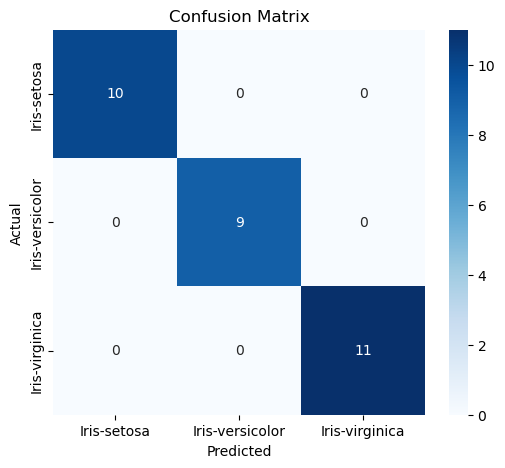

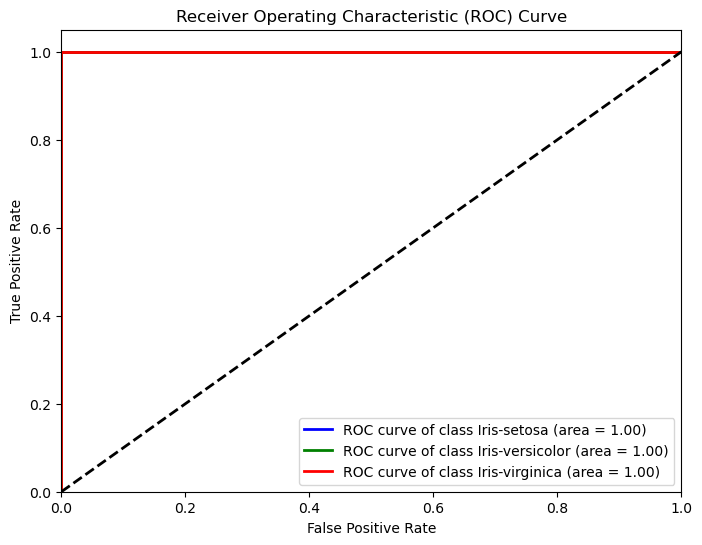

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load the Iris dataset
iris_df = pd.read_csv("C:/Users/preet/Downloads/IRIS.csv")

# Prepare features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Binarize the output for ROC curve
classes = label_encoder.classes_
y_bin = label_binarize(y_encoded, classes=np.arange(len(classes)))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Support Vector Classifier with probability estimates enabled
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)

# Predict the test set labels
y_pred = svc.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for ROC curve
y_score = svc.predict_proba(X_test)

# Binarize y_test for ROC curve
y_test_bin = label_binarize(y_test, classes=np.arange(len(classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
